In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load The Data 

In [34]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Print the shape of the dataset
print(f"Shape of diabetes_X: {diabetes_X.shape}")
print(f"Shape of diabetes_y: {diabetes_y.shape}")

Shape of diabetes_X: (442, 10)
Shape of diabetes_y: (442,)


In [47]:
# Use only the BMI feature
diabetes_X_bmi = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X_bmi, diabetes_y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print(f"Shape of diabetes_X_train: {diabetes_X_train.shape}")
print(f"Shape of diabetes_X_test: {diabetes_X_test.shape}")
print(f"Shape of diabetes_y_train: {diabetes_y_train.shape}")
print(f"Shape of diabetes_y_test: {diabetes_y_test.shape}")


Shape of diabetes_X_train: (353, 1)
Shape of diabetes_X_test: (89, 1)
Shape of diabetes_y_train: (353,)
Shape of diabetes_y_test: (89,)


# The coefficients

In [49]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
slope = regr.coef_[0]
intercept = regr.intercept_
print(f"Coefficient (Slope): {slope}")
print(f"Intercept: {intercept}")

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(diabetes_y_test, diabetes_y_pred)
print(f"Coefficient of Determination (R²): {r2}")





Coefficient (Slope): 998.5776891375593
Intercept: 152.00335421448167
Coefficient of Determination (R²): 0.23335039815872138


# Predictions on the training set

In [42]:
# Predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)
# Calculate MAE and MSE for training set
mae_train = mean_absolute_error(diabetes_y_train, diabetes_y_train_pred)
mse_train = mean_squared_error(diabetes_y_train, diabetes_y_train_pred)
print(f"Training MAE: {mae_train}")
print(f"Training MSE: {mse_train}")

Training MAE: 51.37972765404719
Training MSE: 3854.11265207582


# Calculate MAE and MSE for testing set

In [44]:
# Calculate MAE and MSE for testing set
mae_test = mean_absolute_error(diabetes_y_test, diabetes_y_pred)
mse_test = mean_squared_error(diabetes_y_test, diabetes_y_pred)
print(f"Testing MAE: {mae_test}")
print(f"Testing MSE: {mse_test}")


Testing MAE: 52.25997644534553
Testing MSE: 4061.8259284949268


# Plot outputs

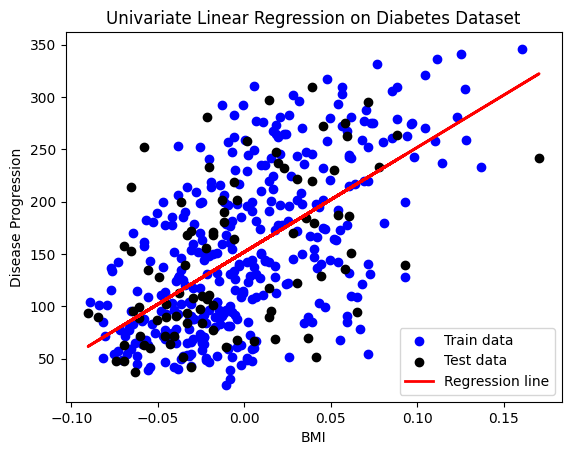

In [45]:
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color='blue', label='Train data')
plt.scatter(diabetes_X_test, diabetes_y_test, color='black', label='Test data')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.title('Univariate Linear Regression on Diabetes Dataset')
plt.show()

